In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('NFLX_nodata.csv')

# df.index = df['Date']
# df = df[['Close']]
df

,Open,High,Low,Close,Volume,SMA30,SMA8,EMA50,EMA12,K,D,RSI,Month,Year,Day,Day_Name
0,315.799988,317.000000,307.339996,313.480011,9925200,291.264666,320.023750,299.206963,314.170719,59.605911,67.868628,62.913629,3,2018,19,1
1,313.260010,319.500000,312.799988,317.500000,5991900,293.372666,320.086250,300.216405,314.685819,67.527072,65.510667,64.226588,3,2018,20,2
2,316.350006,319.399994,314.510010,316.480011,5263900,295.064667,318.216251,301.099756,314.963171,65.517241,64.216742,64.205607,3,2018,21,3
3,313.070007,314.119995,305.660004,306.700012,8063300,296.469334,316.391254,301.399407,313.686766,25.013757,52.686023,53.106117,3,2018,22,4
4,307.410004,309.369995,300.359985,300.940002,9529900,298.164000,314.523754,301.375172,311.719007,1.725213,30.752070,41.505554,3,2018,23,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,401.970001,427.700012,398.200012,427.140015,20047500,527.323000,402.152504,539.286213,435.893139,39.251083,24.587551,29.680923,1,2022,31,1
976,432.959991,458.480011,425.540009,457.130005,22542300,523.003001,395.762504,536.064401,439.160349,54.805248,37.039918,36.337520,2,2022,1,2
977,448.250000,451.980011,426.480011,429.480011,14346000,517.527668,399.760006,531.884621,437.671066,41.208485,45.088272,33.694538,2,2022,2,3
978,421.440002,429.260010,404.279999,405.600006,9905200,510.883669,402.066257,526.932283,432.737057,28.965820,41.659851,33.107304,2,2022,3,4


In [2]:
train = df.iloc[:950]
test = df.iloc[950:]

In [3]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df.head(),df.tail()

(         Open        High         Low       Close   Volume       SMA30  \
 0  315.799988  317.000000  307.339996  313.480011  9925200  291.264666   
 1  313.260010  319.500000  312.799988  317.500000  5991900  293.372666   
 2  316.350006  319.399994  314.510010  316.480011  5263900  295.064667   
 3  313.070007  314.119995  305.660004  306.700012  8063300  296.469334   
 4  307.410004  309.369995  300.359985  300.940002  9529900  298.164000   
 
          SMA8       EMA50       EMA12          K          D        RSI  Month  \
 0  320.023750  299.206963  314.170719  59.605911  67.868628  62.913629      3   
 1  320.086250  300.216405  314.685819  67.527072  65.510667  64.226588      3   
 2  318.216251  301.099756  314.963171  65.517241  64.216742  64.205607      3   
 3  316.391254  301.399407  313.686766  25.013757  52.686023  53.106117      3   
 4  314.523754  301.375172  311.719007   1.725213  30.752070  41.505554      3   
 
    Year  Day  Day_Name  
 0  2018   19         1  
 1

In [4]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

scaled_train[:10]

array([[0.17860959, 0.14733314, 0.1673262 , 0.17387127, 0.15333948,
        0.05979745, 0.1538145 , 0.04194648, 0.13312706, 0.59518995,
        0.67544857, 0.60316624, 0.18181818, 0.        , 0.6       ,
        0.        ],
       [0.17306899, 0.1528845 , 0.17932987, 0.18265218, 0.08465523,
        0.06509224, 0.15396252, 0.04476143, 0.13436636, 0.67471605,
        0.65102068, 0.61881699, 0.18181818, 0.        , 0.63333333,
        0.25      ],
       [0.17980938, 0.15266243, 0.18308932, 0.18042421, 0.07194271,
        0.06934214, 0.14953391, 0.04722476, 0.13503365, 0.65453794,
        0.63761594, 0.61856688, 0.18181818, 0.        , 0.66666667,
        0.5       ],
       [0.17265452, 0.14093796, 0.16363277, 0.15906164, 0.12082652,
        0.07287032, 0.14521187, 0.04806037, 0.13196271, 0.247895  ,
        0.51816057, 0.48625867, 0.18181818, 0.        , 0.7       ,
        0.75      ],
       [0.16030803, 0.13039038, 0.15198079, 0.14647998, 0.14643665,
        0.07712692, 0.14078917, 

In [5]:
from keras.preprocessing.sequence import TimeseriesGenerator
n_input = 12
n_features = 16
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [6]:
X,y = generator[0]
# print(f'Given the Array: \n{X.flatten()}')
# print(f'Predict this y: \n {y}')

In [7]:
X.shape

(1, 12, 16)

In [8]:
# n_input = 12
# generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               46800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 46,901
Trainable params: 46,901
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.fit(generator,epochs=50)

Epoch 1/50
938/938 [==============================] - 3s 2ms/step - loss: 0.0609
Epoch 2/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0595
Epoch 3/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0593
Epoch 4/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0592
Epoch 5/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0592
Epoch 6/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0591
Epoch 7/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0591
Epoch 8/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0591
Epoch 9/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0590
Epoch 10/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0590
Epoch 11/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0589
Epoch 12/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0590
Epoch 13/50
938/938 [====

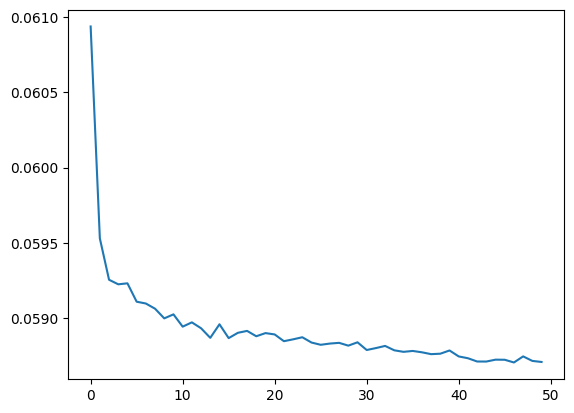

In [11]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [12]:
last_train_batch = scaled_train[-12:]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))
model.predict(last_train_batch)
scaled_test[0]

1/1 [==============================] - 0s 101ms/step


array([0.83432595, 0.81323004, 0.82737542, 0.83049742, 0.00833124,
       0.92234981, 0.8191786 , 0.95100168, 0.8424027 , 0.63711241,
       0.57169495, 0.51381275, 1.        , 1.        , 0.73333333,
       0.75      ])

In [13]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))
print(current_batch)


for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    print(current_pred.shape)
    # append the prediction into the array
    test_predictions.append(current_pred) 
    # print(current_batch[:,1:,:].shape)
    # print([[current_pred]])
    # use the prediction to update the batch and remove the first value
    current_batch[:,0,:] = current_pred
    current_batch = np.append(current_batch,axis=1)



[[[0.84180799 0.8398988  0.83579563 0.85559515 0.0345962  0.9850048
   0.88969607 0.98590138 0.90759825 0.29310418 0.16084068 0.18691389
   1.         1.         0.2        0.25      ]
  [0.86399237 0.84782616 0.86173765 0.86105593 0.01879462 0.98161895
   0.87857717 0.98484829 0.90464019 0.33837108 0.25209883 0.17583442
   1.         1.         0.23333333 0.5       ]
  [0.85871352 0.84289648 0.83368505 0.82374784 0.02151873 0.97727193
   0.86293491 0.98196867 0.89581517 0.16716667 0.25038574 0.15946967
   1.         1.         0.26666667 0.75      ]
  [0.83515488 0.81513967 0.82365999 0.82518942 0.0280077  0.97204831
   0.85398293 0.97927416 0.88859213 0.20418234 0.21980024 0.17041387
   1.         1.         0.3        1.        ]
  [0.82472792 0.80381495 0.8096777  0.80968086 0.02399138 0.96486886
   0.85007236 0.97590887 0.87985232 0.12541288 0.14655126 0.20067558
   1.         1.         0.4        0.        ]
  [0.79573772 0.78083223 0.784637   0.79532991 0.03213926 0.95790459
  

TypeError: _append_dispatcher() missing 1 required positional argument: 'values'

In [ ]:
test_preds_lst = []
for i in range(len(test_predictions)):
    x = [test_predictions[(i)][0]]+(15*[0])
    test_preds_lst.append(x)



test_predictions = np.array(test_preds_lst)
# test_predictions = test_predictions.reshape(-1, 1)
test_predictions

array([[0.72473872, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.72473872, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.72473872, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.72473872, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.72473872, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 

In [ ]:
test.head()

,Open,High,Low,Close,Volume,SMA30,SMA8,EMA50,EMA12,K,D,RSI,Month,Year,Day,Day_Name
950,616.400024,616.880005,607.570007,614.090027,1621100,634.670335,600.976242,625.194722,608.973819,63.781578,57.853558,55.417661,12,2021,23,4
951,615.000000,615.000000,609.250000,613.119995,2061500,633.188334,602.867493,624.721203,609.611692,61.869056,63.242627,50.213311,12,2021,27,1
952,614.950012,618.409973,609.690002,610.710022,1882800,630.791669,603.576248,624.171745,609.780666,57.117535,60.922723,41.767243,12,2021,28,2
953,610.710022,613.979980,604.679993,610.539978,1287200,628.498667,606.011246,623.637166,609.897483,59.381419,59.456003,40.031801,12,2021,29,3
954,612.989990,620.609985,611.239990,612.090027,1625100,625.988334,609.181251,623.184337,610.234797,78.080887,64.859947,50.752261,12,2021,30,4


In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)
test['Predictions'] = true_predictions
test.plot(figsize=(14,5))

ValueError: Expected a 1D array, got an array with shape (30, 16)